# Are brains like faces?


Copyright 2019 Allen Downey

[MIT License](https://opensource.org/licenses/MIT)

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore', FutureWarning)

Load the NKI SBA volume data, since it seems to have the most features with the highest Cohen effects.

In [2]:
df = pd.read_excel('brain_mosaic_data/NKI_SBA_Volume.xlsx')
df.head()

,bio_sex,age,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,2,41,5443,408,14526,47120,6506,2944,4535,1828,...,1151,13009,16499,10019,9201,7703,783,1945,923,6297
1,2,52,3228,309,13065,48090,6942,2918,5000,1734,...,1308,13780,18011,11602,12166,10272,747,1921,790,5537
2,2,54,5642,95,9687,38398,6385,2892,4351,1051,...,1903,13247,17477,10010,8808,8331,1193,2043,484,6033
3,2,56,4959,231,11442,41214,6195,3604,5135,1592,...,1753,12481,17378,9682,10091,9396,802,2336,799,6159
4,2,31,6664,161,12059,44711,6613,2981,4558,1462,...,1396,11924,21013,12134,10928,10362,699,2549,911,5853


Make the column names play nicely with StatsModels.

In [3]:
def clean_name(name):
    """Make column names play nicely with StatsModels.
    """
    name = name.replace('-', '_').lower()
    d = {'3rd_ventricle':'third_ventricle', '4th_ventricle':'fourth_ventricle'}
    return d.get(name, name)

In [4]:
columns = [clean_name(name) for name in df.columns]
df.columns = columns
df.head()

,bio_sex,age,left_lateral_ventricle,left_inf_lat_vent,left_cerebellum_white_matter,left_cerebellum_cortex,left_thalamus_proper,left_caudate,left_putamen,left_pallidum,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,2,41,5443,408,14526,47120,6506,2944,4535,1828,...,1151,13009,16499,10019,9201,7703,783,1945,923,6297
1,2,52,3228,309,13065,48090,6942,2918,5000,1734,...,1308,13780,18011,11602,12166,10272,747,1921,790,5537
2,2,54,5642,95,9687,38398,6385,2892,4351,1051,...,1903,13247,17477,10010,8808,8331,1193,2043,484,6033
3,2,56,4959,231,11442,41214,6195,3604,5135,1592,...,1753,12481,17378,9682,10091,9396,802,2336,799,6159
4,2,31,6664,161,12059,44711,6613,2981,4558,1462,...,1396,11924,21013,12134,10928,10362,699,2549,911,5853


Make a binary variable for StatsModels.

In [5]:
df['male'] = (df['bio_sex'] == 1).astype(int)
df['male'].mean()

0.3786764705882353

Select the volumetric features (I don't know what the other features are).

In [6]:
features = [name for name in df.columns if name.endswith('volume')]
len(features)

68

Compute total volume.

In [7]:
df['total_volume'] = df[features].sum(axis=1)
df['total_volume'].describe()

count       272.000000
mean     455371.117647
std       56890.820457
min      336198.000000
25%      416941.500000
50%      450121.000000
75%      489089.250000
max      684464.000000
Name: total_volume, dtype: float64

Make sure the new variables are on the feature list.

In [8]:
features = [name for name in df.columns if name.endswith('volume')]
len(features)

69

Distribution of volumes.

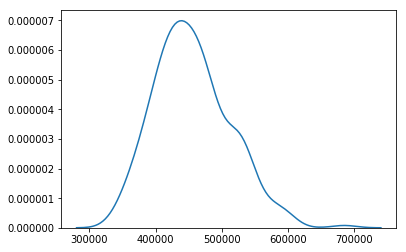

In [9]:
var = 'total_volume'
sns.kdeplot(df[var].values);

Distributions of total volume for male and female subjects.  As expected, men have bigger brains.

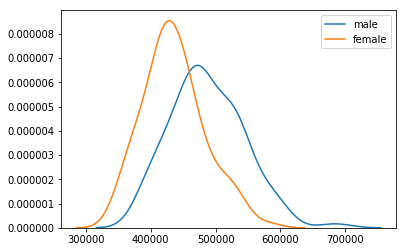

In [10]:
male = df['bio_sex'] == 1
female = df['bio_sex'] == 2

sns.kdeplot(df.loc[male, var], label='male')
sns.kdeplot(df.loc[female, var], label='female');

## Cohen effect size

Let's look for the features that show the biggest difference between men and women.

In [11]:
def cohen_effect_size(group1, group2):
    """Compute Cohen's effect size (d).

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [12]:
def compute_cohen_effect(df, features):
    res = pd.Series()

    grouped = df.groupby('male')
    for var in features:
        groups = grouped[var]
        male = groups.get_group(1)
        female = groups.get_group(0)
        d = cohen_effect_size(male, female)
        res[var] = d
        
    return res

Here are the top features by Cohen effect size.  The biggest difference is in total volume.  I suspect that the other top candidates are strongly correlated with total volume.

In [13]:
num_features = 12

res = compute_cohen_effect(df, features)
top_by_cohen = res.sort_values(ascending=False).iloc[:num_features]

total_volume                      0.998091
rh_superiorfrontal_volume         0.970546
rh_inferiortemporal_volume        0.964111
rh_lateraloccipital_volume        0.960110
rh_precuneus_volume               0.958064
lh_middletemporal_volume          0.953209
lh_superiorfrontal_volume         0.941572
lh_medialorbitofrontal_volume     0.937211
rh_rostralmiddlefrontal_volume    0.927699
lh_inferiortemporal_volume        0.909025
rh_fusiform_volume                0.890256
rh_lateralorbitofrontal_volume    0.874188
dtype: float64